<a href="https://colab.research.google.com/github/AlejandroMesaR/LaboratoriosSocialNetwork/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Representaciones Detalladas de Redes en Computación**

Las redes pueden ser representadas de diversas maneras. Las dos representaciones más comunes, como ya sabemos, son la ***Matriz de Adyacencia y la Lista de Adyacencia***. Sin embargo, el modo en que construimos y utilizamos estas representaciones puede variar según la aplicación.

## **1. Matriz de Adyacencia**

### **Red de amigos en una red social pequeña**
Imagina que tienes una red social con 4 personas: Alice, Bob, Charlie, y David. Alice es amiga de Bob y Charlie, pero Bob y Charlie no son amigos entre ellos. David, por su parte, no tiene amigos en esta red.

Una representación de estar red puede ser




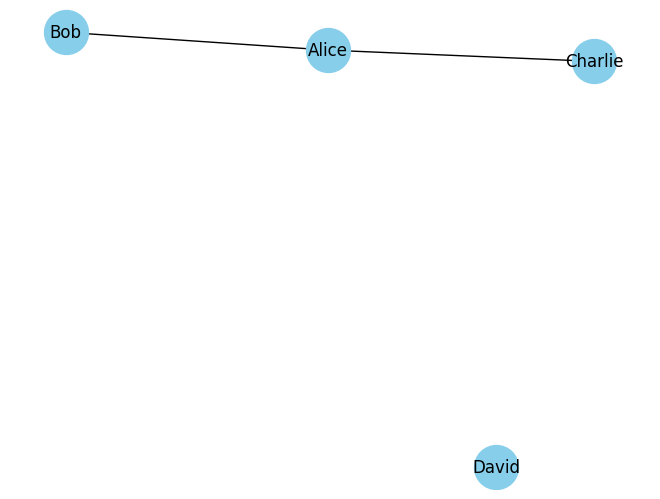

In [ ]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Nombres para índices
personas = ["Alice", "Bob", "Charlie", "David"]

# Matriz de adyacencia
# 0 = no son amigos, 1 = son amigos
# A = Alice, B = Bob, C = Charlie, D = David
matriz = np.array([
    [0, 1, 1, 0], # A
    [1, 0, 0, 0], # B
    [1, 0, 0, 0], # C
    [0, 0, 0, 0]  # D
])


# Crear el grafo a partir de la matriz
grafo = nx.from_numpy_array(matriz) # Esta es la línea que cambia

# Cambiar los nombres de los nodos usando un diccionario
mapeo = dict(zip(range(4), personas))
grafo = nx.relabel_nodes(grafo, mapeo)

# Graficar la red
nx.draw(grafo, with_labels=True, node_color='skyblue', node_size=1000)
plt.show()


### **Ventajas:**
-  Acceso en tiempo constante para determinar la presencia de una arista entre dos nodos.
-  Es intuitivo para algunas operaciones de grafos, como la multiplicación de matrices para obtener caminos de longitud n.

### **Desventajas:**
Requiere una cantidad significativa de memoria para grafos grandes, especialmente si son dispersos.

# **2. Lista de Adyacencia**
### **Sistema de recomendación de artículos**

Supongamos que estás construyendo un sistema de recomendación para artículos. Tienes 3 artículos, y los lectores que leen el artículo A tienden a leer el artículo B, pero no el C.

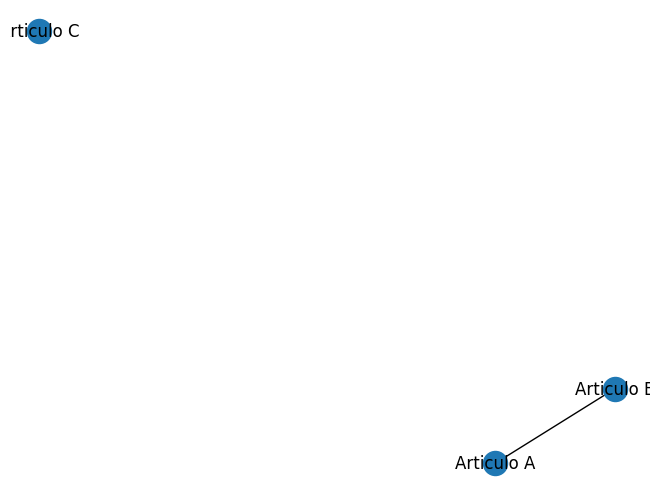

In [ ]:
# Lista de adyacencia
articulos = ["Articulo A", "Articulo B", "Articulo C"]
adj_list = {
    "Articulo A": ["Articulo B"],
    "Articulo B": [],
    "Articulo C": []
}

# Crear grafo desde lista de adyacencia
G = nx.from_dict_of_lists(adj_list)
nx.draw(G, with_labels=True)
plt.show()


## **Ventajas**
- Más eficiente en términos de memoria para grafos dispersos.
- Más rápido para iterar sobre todos los vecinos de un nodo específico.
## **Desventajas**
 - Más lento al verificar la presencia de una arista específica.

# **Construyendo Redes: Nodo a Nodo vs Usando Estructuras**

Crear una red nodo a nodo puede ser intuitivo y permite un control más granular, pero puede ser ineficiente para redes grandes. Usar estructuras predefinidas, como matrices de adyacencia o listas de adyacencia, puede facilitar y acelerar la creación de redes, especialmente si la estructura de la red puede inferirse de datos existentes.

Por ejemplo, si estás construyendo una red social desde cero, agregar relaciones amigo a amigo (nodo a nodo) podría tener sentido. Sin embargo, si estás analizando datos de tráfico web y quieres construir una red de páginas y sus enlaces, una estructura de lista de adyacencia podría generarse más rápidamente a partir de registros de datos.

# **Taller: Explorando el Universo de los Cómics a través de las Redes Sociales**

## **1. Introducción:**
La idea detrás de este taller es que construyan su propia red de colaboraciones entre personajes de cómics. Normalmente es a partir de su lectura, investigaciones, o incluso la visualización de películas o series, se pueden identificar interacciones entre personajes y luego  se pueden visualizan estas relaciones usando Python y NetworkX.

## **2. Pasos Preliminares:**
### **A. Investigación:**
Antes de codificar, haz una lista de al menos 10 personajes de cómics que te interesen. Podría ser de universos como Marvel, DC, u otros.

### **B. Relaciones:**
Define relaciones entre estos personajes. Pregúntate cosas como:

-  ¿Estos personajes han aparecido juntos en un cómic, película o serie?
-  ¿Son aliados o enemigos?
-  ¿Cuál es la naturaleza de su relación (amigos, familia, rivales)?

## **3. Plantilla de Código en Python**
A continuación, te proporcionamos una plantilla para que construyas tu red basada en tu investigación.

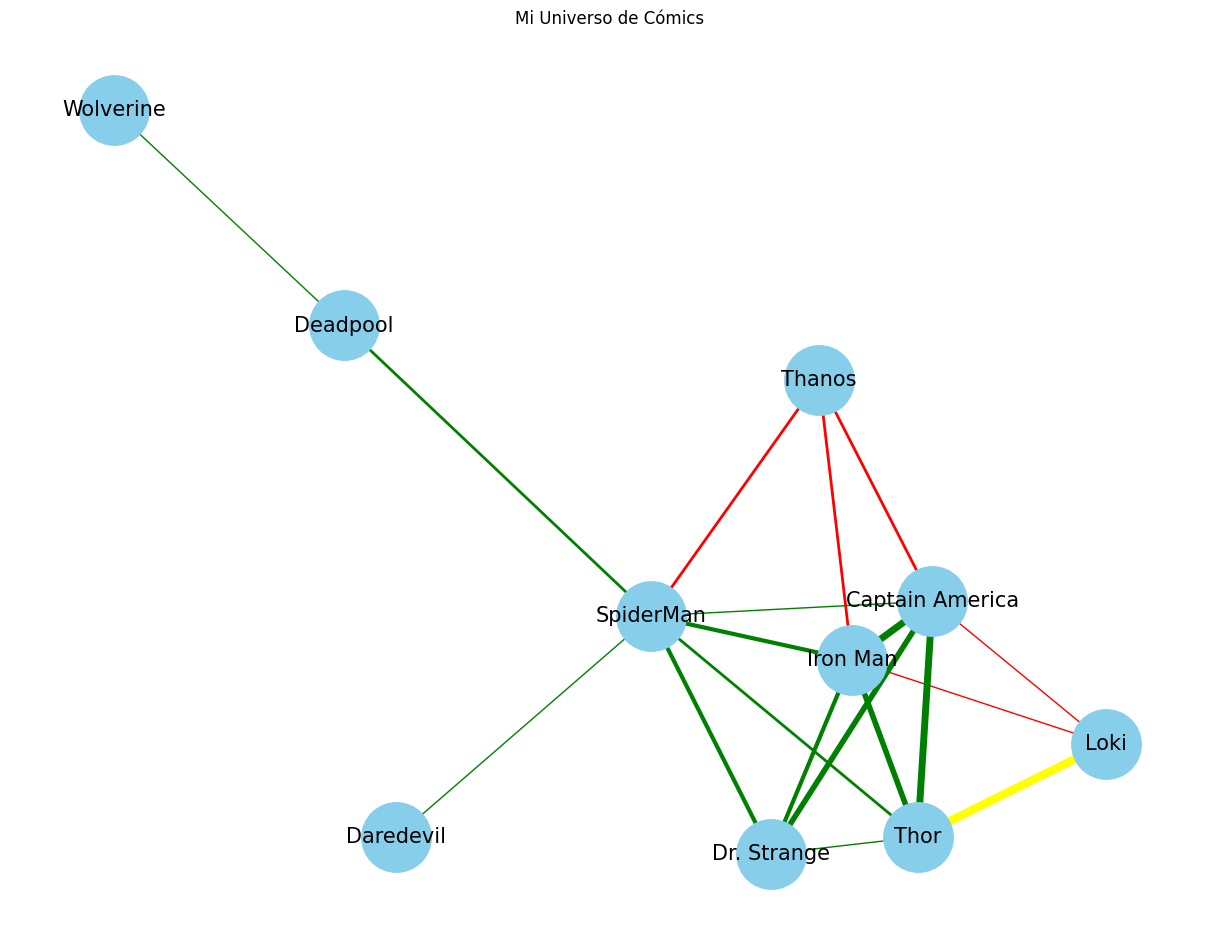

In [ ]:
# Importando librerías
import networkx as nx
import matplotlib.pyplot as plt

# Inicializando grafo
G = nx.Graph()

# Lista de personajes
characters = [
    "Iron Man", "Captain America", "Thanos", "SpiderMan", "Wolverine", "Thor", "Loki", "Daredevil", "Dr. Strange", "Deadpool"
]
G.add_nodes_from(characters)

# Definiendo relaciones
relations = [
    ("Iron Man", "Captain America",{"categoria": "aliados", "fuerza": 5}), ("Iron Man", "Thanos",{"categoria": "enemigo", "fuerza": 2}),
    ("Iron Man", "SpiderMan",{"categoria": "aliados", "fuerza": 3}), ("SpiderMan", "Deadpool",{"categoria": "aliados", "fuerza": 2}),
    ("Iron Man", "Thor",{"categoria": "aliados", "fuerza": 4}), ("Iron Man", "Loki",{"categoria": "enemigo", "fuerza": 1}),
    ("Iron Man", "Dr. Strange",{"categoria": "aliados", "fuerza": 3}), ("Captain America", "Thanos",{"categoria": "enemigo", "fuerza": 2}),
    ("Captain America", "SpiderMan",{"categoria": "aliados", "fuerza": 1}), ("Deadpool", "Wolverine",{"categoria": "aliados", "fuerza": 1}),
    ("Captain America", "Thor",{"categoria": "aliados", "fuerza": 5}), ("Captain America", "Loki",{"categoria": "enemigo", "fuerza": 1}),
    ("Captain America", "Dr. Strange",{"categoria": "aliados", "fuerza": 4}), ("SpiderMan", "Thanos",{"categoria": "enemigo", "fuerza": 2}),
    ("SpiderMan", "Thor",{"categoria": "aliados", "fuerza": 2}), ("SpiderMan", "Daredevil",{"categoria": "aliados", "fuerza": 1}),
    ("SpiderMan", "Dr. Strange",{"categoria": "aliados", "fuerza": 3}), ("Thor", "Loki",{"categoria": "familia", "fuerza": 6}),
    ("Thor", "Dr. Strange",{"categoria": "aliados", "fuerza": 1})
]
G.add_edges_from(relations)

categorias = nx.get_edge_attributes(G, 'categoria')
fuerzas = nx.get_edge_attributes(G, 'fuerza')

edge_colors = []
edge_widths = []
for u, v, attrs in G.edges(data=True):
  categoria = attrs["categoria"]
  fuerza = attrs['fuerza']
  edge_colors.append({'aliados': 'green', 'enemigo': 'red', 'familia': 'yellow'}[categoria])
  edge_widths.append(fuerza)

plt.figure(figsize=(12, 9))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, font_size=15, edge_color = edge_colors, width = edge_widths)
plt.title("Mi Universo de Cómics")
plt.show()


## **4. Desafíos:**
**A. Clasifica las relaciones en diferentes categorías**, como 'aliados', 'enemigos', 'familia', etc. Diferencia estas categorías con diferentes colores o grosores de líneas en la visualización.

**B.Puedes determinar  qué personaje es el "más importante"** o "más conectado" en tu universo. Solo con analizar el grafo de la red.

**C. Introduce un factor de "fuerza de relación".** Por ejemplo, si Iron Man y Capitan America han colaborado en 5 cómics juntos, su relación tiene un peso de 5. Visualiza estas relaciones ponderadas con diferentes grosores de línea.



In [ ]:
# Calcular el grado de centralidad de los nodos
degree_centrality = nx.degree_centrality(G)

# Encontrar el nodo más conectado
personaje_mas_conectado = max(degree_centrality, key=degree_centrality.get)
print("El personaje más conectado es:", personaje_mas_conectado)

El personaje más conectado es: SpiderMan
